In [1]:
import time

import ambulance_game as abg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lambda_1 = 5
lambda_2 = 5
mu = 3
num_of_servers = 4
threshold = 10
system_capacity = 15
buffer_capacity = 15

In [3]:
waiting_formulas = (
    abg.markov.mean_waiting_time_formula_using_recursive_approach,
    abg.markov.mean_waiting_time_formula_using_direct_approach,
    abg.markov.mean_waiting_time_formula_using_closed_form_approach,
)

## Run all three formulas for some paramteres

In [4]:
for selected_waiting_formula in waiting_formulas:
    print(selected_waiting_formula.__name__, end=":\t ")
    print(
        abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
            lambda_1=lambda_1,
            lambda_2=lambda_2,
            mu=mu,
            num_of_servers=num_of_servers,
            threshold=threshold,
            system_capacity=system_capacity,
            buffer_capacity=buffer_capacity,
            class_type=None,
            waiting_formula=selected_waiting_formula,
        ),
    )

mean_waiting_time_formula_using_recursive_approach:	 0.22949130146059038
mean_waiting_time_formula_using_direct_approach:	 0.22949130146059038
mean_waiting_time_formula_using_closed_form_approach:	 0.2294913014605903


# Using the script output 😁

### Durations

In [5]:
def output_to_file(str_list, filename="demo.csv"):
    with open(filename, "a") as f:
        f.write(str_list + "\n")

In [6]:
def read_file(filename="demo.csv"):    
    with open(filename, "r") as f:
        csvfile = f.read().splitlines()
        list_of_str = [row.split(",") for row in csvfile]
        times = np.array([[float(i) for i in row] for row in list_of_str])
    return times

In [7]:
durations_N = read_file("data/algorithm_duration_over_N.csv")
durations_M = read_file("data/algorithm_duration_over_M.csv")
durations_N_and_M = read_file("data/algorithm_duration_over_N_and_M.csv")

In [8]:
durations_N = [tuple(row) for row in durations_N]
durations_N = np.unique(durations_N, axis=0)
durations_M = [tuple(row) for row in durations_M]
durations_M = np.unique(durations_M, axis=0)
durations_N_and_M = [tuple(row) for row in durations_N_and_M]
durations_N_and_M = np.unique(durations_N_and_M, axis=0)

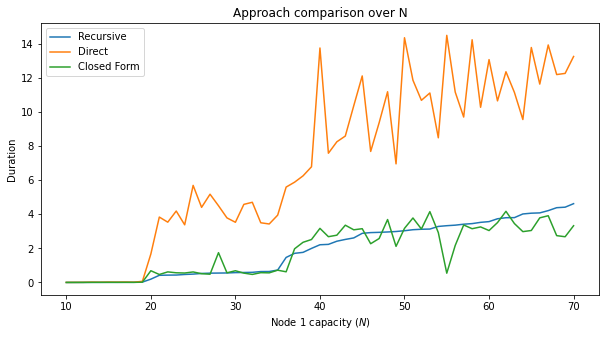

In [60]:
start, end = 10, 70
buffer_capacity_space = np.linspace(start, end, end - start + 1, dtype=int)

plt.figure(figsize=(10, 5))
plt.plot(
    buffer_capacity_space, durations_N[:, 0], label="Recursive"
)
plt.plot(
    buffer_capacity_space, np.array(durations_N)[:, 1], label="Direct"
)
plt.plot(
    buffer_capacity_space, np.array(durations_N)[:, 2], label="Closed Form"
)
plt.title("Approach comparison over N")
plt.xlabel("Node 1 capacity ($N$)")
plt.ylabel("Duration")
plt.legend()
plt.savefig("algorithm_duration_over_N.png", transparent=True)

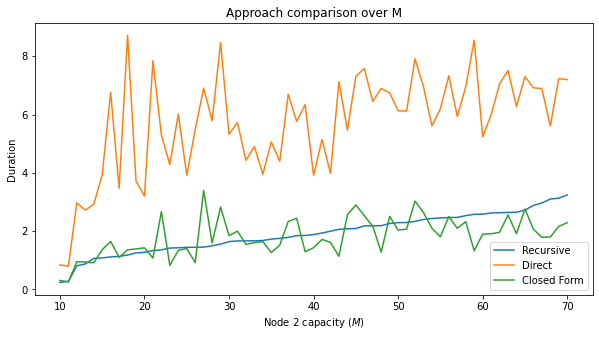

In [61]:
start, end = 10, 70
buffer_capacity_space = np.linspace(start, end, end - start + 1, dtype=int)

plt.figure(figsize=(10, 5))
plt.plot(
    buffer_capacity_space, durations_M[:, 0], label="Recursive"
)
plt.plot(
    buffer_capacity_space, np.array(durations_M)[:, 1], label="Direct"
)
plt.plot(
    buffer_capacity_space, np.array(durations_M)[:, 2], label="Closed Form"
)
plt.title("Approach comparison over M")
plt.xlabel("Node 2 capacity ($M$)")
plt.ylabel("Duration")
plt.legend()
plt.savefig("algorithm_duration_over_M.png", transparent=True)

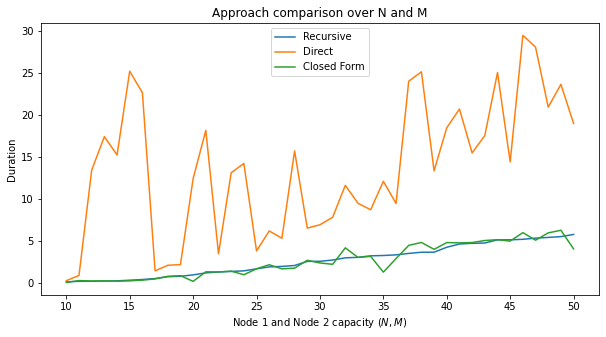

In [62]:
start, end = 10, 50
buffer_capacity_space = np.linspace(start, end, end - start + 1, dtype=int)

plt.figure(figsize=(10, 5))
plt.plot(
    buffer_capacity_space, durations_N_and_M[:, 0], label="Recursive"
)
plt.plot(
    buffer_capacity_space, np.array(durations_N_and_M)[:, 1], label="Direct"
)
plt.plot(
    buffer_capacity_space, np.array(durations_N_and_M)[:, 2], label="Closed Form"
)
plt.title("Approach comparison over N and M")
plt.xlabel("Node 1 and Node 2 capacity ($N, M$)")
plt.ylabel("Duration")
plt.legend()
plt.savefig("algorithm_duration_over_N_and_M.png", transparent=True)

### Values

In [9]:
waiting_times_N = read_file("data/waiting_times_over_N.csv")
waiting_times_M = read_file("data/waiting_times_over_M.csv")
waiting_times_N_and_M = read_file("data/waiting_times_over_N_and_M.csv")

In [10]:
waiting_times_N = [tuple(row) for row in waiting_times_N]
waiting_times_N = np.unique(waiting_times_N, axis=0)
waiting_times_M = [tuple(row) for row in waiting_times_M]
waiting_times_M = np.unique(waiting_times_M, axis=0)
waiting_times_N_and_M = [tuple(row) for row in waiting_times_N_and_M]
waiting_times_N_and_M = np.unique(waiting_times_N_and_M, axis=0)

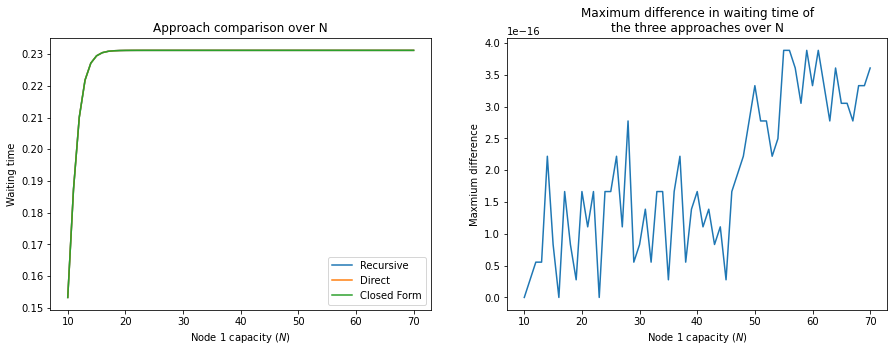

In [104]:
start, end = 10, 70
buffer_capacity_space = np.linspace(start, end, end - start + 1, dtype=int)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(
    buffer_capacity_space, waiting_times_N[:, 0], label="Recursive"
)
plt.plot(
    buffer_capacity_space, np.array(waiting_times_N)[:, 1], label="Direct"
)
plt.plot(
    buffer_capacity_space, np.array(waiting_times_N)[:, 2], label="Closed Form"
)
plt.title("Approach comparison over N")
plt.xlabel("Node 1 capacity ($N$)")
plt.ylabel("Waiting time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(buffer_capacity_space, np.max(np.abs(np.diff(waiting_times_N[:, :3])), axis=1))
plt.title("Maximum difference in waiting time of\nthe three approaches over N")
plt.xlabel("Node 1 capacity ($N$)")
plt.ylabel("Maxmium difference")

plt.savefig("waiting_time_over_N.pdf", transparent=True)

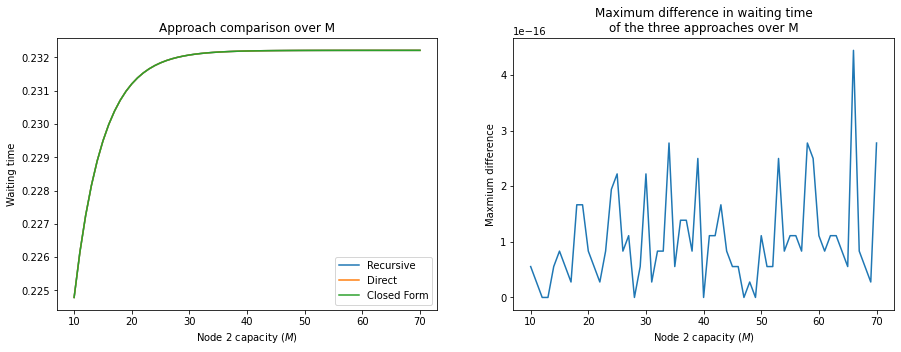

In [103]:
start, end = 10, 70
buffer_capacity_space = np.linspace(start, end, end - start + 1, dtype=int)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(
    buffer_capacity_space, waiting_times_M[:, 0], label="Recursive"
)
plt.plot(
    buffer_capacity_space, np.array(waiting_times_M)[:, 1], label="Direct"
)
plt.plot(
    buffer_capacity_space, np.array(waiting_times_M)[:, 2], label="Closed Form"
)
plt.title("Approach comparison over M")
plt.xlabel("Node 2 capacity ($M$)")
plt.ylabel("Waiting time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(buffer_capacity_space, np.max(np.abs(np.diff(waiting_times_M[:, :3])), axis=1))
plt.title("Maximum difference in waiting time\nof the three approaches over M")
plt.xlabel("Node 2 capacity ($M$)")
plt.ylabel("Maxmium difference")

plt.savefig("waiting_time_over_M.pdf", transparent=True)

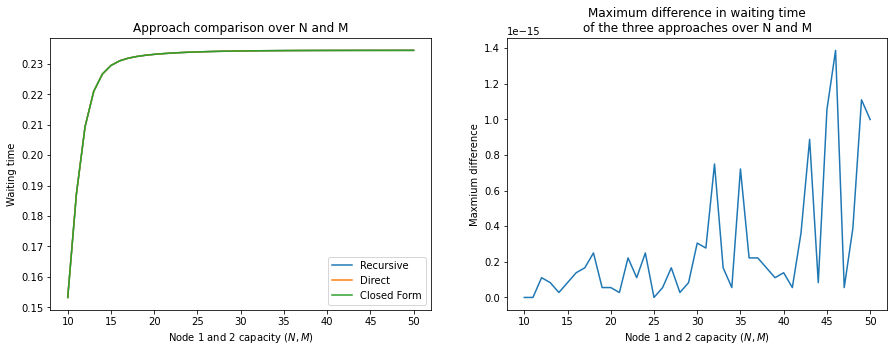

In [102]:
start, end = 10, 50
buffer_capacity_space = np.linspace(start, end, end - start + 1, dtype=int)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

plt.plot(
    buffer_capacity_space, waiting_times_N_and_M[:, 0], label="Recursive"
)
plt.plot(
    buffer_capacity_space, np.array(waiting_times_N_and_M)[:, 1], label="Direct"
)
plt.plot(
    buffer_capacity_space, np.array(waiting_times_N_and_M)[:, 2], label="Closed Form"
)
plt.title("Approach comparison over N and M")
plt.xlabel("Node 1 and 2 capacity ($N,M$)")
plt.ylabel("Waiting time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(buffer_capacity_space, np.max(np.abs(np.diff(waiting_times_N_and_M[:, :3])), axis=1))
plt.title("Maximum difference in waiting time\nof the three approaches over N and M")
plt.xlabel("Node 1 and 2 capacity ($N,M$)")
plt.ylabel("Maxmium difference")

plt.savefig("waiting_time_over_N_and_M.pdf", transparent=True)